In [1]:
!git clone https://github.com/pedropro/TACO.git

Cloning into 'TACO'...
remote: Enumerating objects: 740, done.
remote: Counting objects: 100% (435/435), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 740 (delta 416), reused 380 (delta 380), pack-reused 305 (from 1)
Receiving objects: 100% (740/740), 97.48 MiB | 11.00 MiB/s, done.
Resolving deltas: 100% (499/499), done.


In [2]:
%cd TACO
!python3 download.py

/content/TACO
Note. If for any reason the connection is broken. Just call me again and I will start where I left.
Finished


In [109]:
import os

# Check the number of batch folders downloaded
data_path = 'data/'
batches = [folder for folder in os.listdir(data_path) if folder.startswith('batch_')]
print(f"Total number of batches: {len(batches)}")

Total number of batches: 15


In [155]:
# Dataset Overview
num_images = len(data['images'])
num_categories = len(data['categories'])
num_annotations = len(data['annotations'])

print(f"Total images: {num_images}")
print(f"Total categories: {num_categories}")
print(f"Total annotations: {num_annotations}")

Total images: 1500
Total categories: 60
Total annotations: 4784


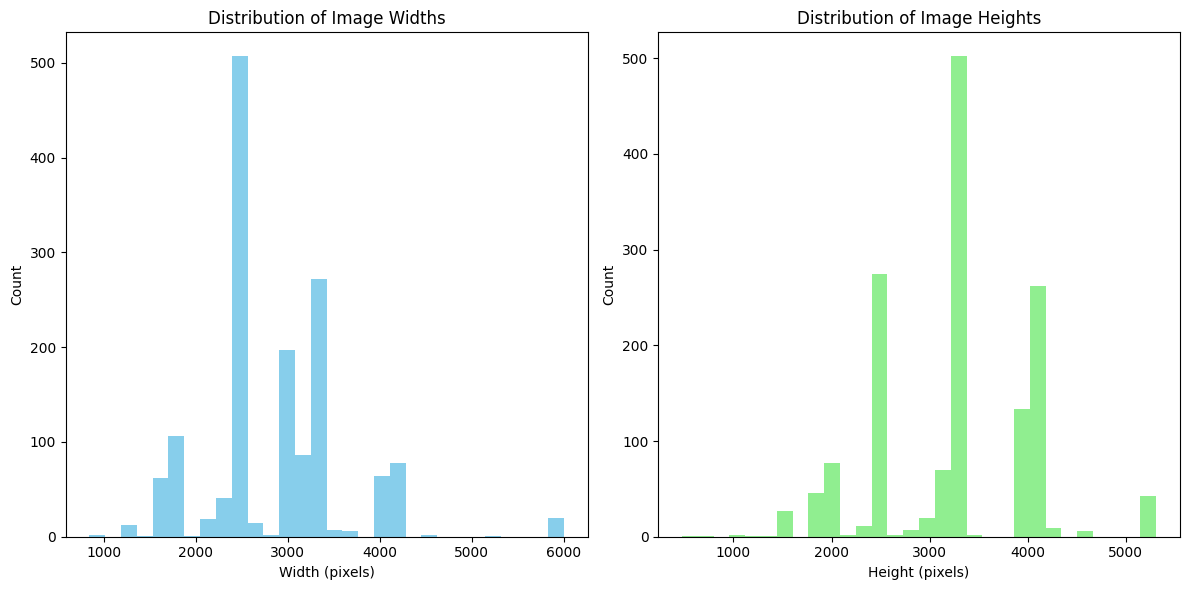

In [157]:
# Extract image dimensions
image_widths = [img['width'] for img in data['images']]
image_heights = [img['height'] for img in data['images']]

# Plot image width and height distributions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(image_widths, bins=30, color='skyblue')
plt.title("Distribution of Image Widths")
plt.xlabel("Width (pixels)")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
plt.hist(image_heights, bins=30, color='lightgreen')
plt.title("Distribution of Image Heights")
plt.xlabel("Height (pixels)")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


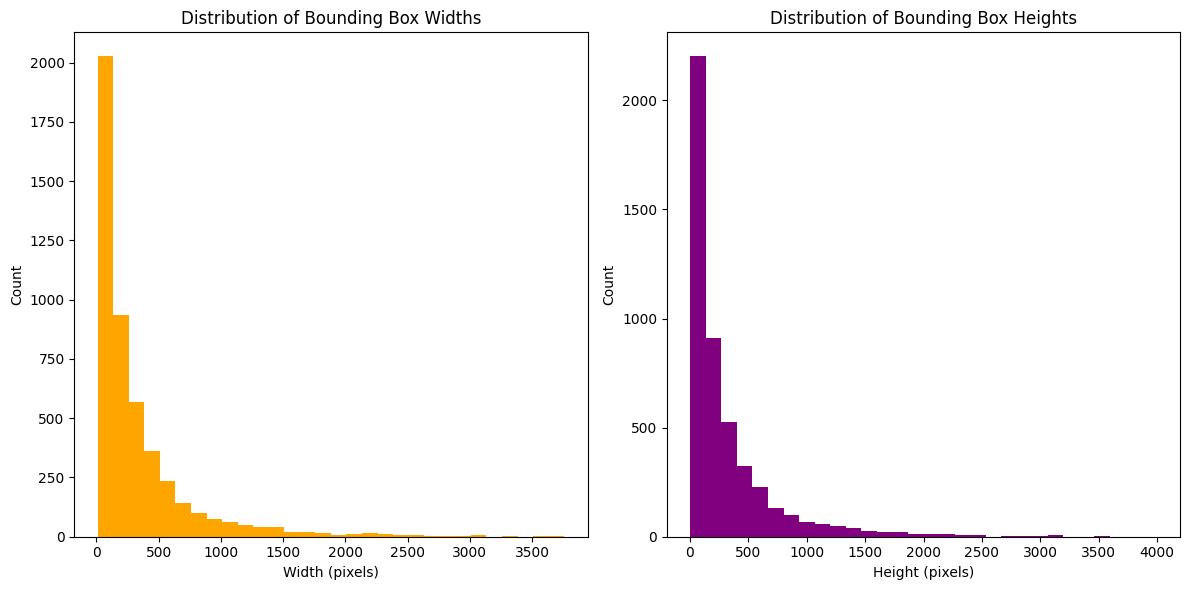

In [159]:
# Plot the distribution of bounding box sizes
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(bbox_widths, bins=30, color='orange')
plt.title("Distribution of Bounding Box Widths")
plt.xlabel("Width (pixels)")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
plt.hist(bbox_heights, bins=30, color='purple')
plt.title("Distribution of Bounding Box Heights")
plt.xlabel("Height (pixels)")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


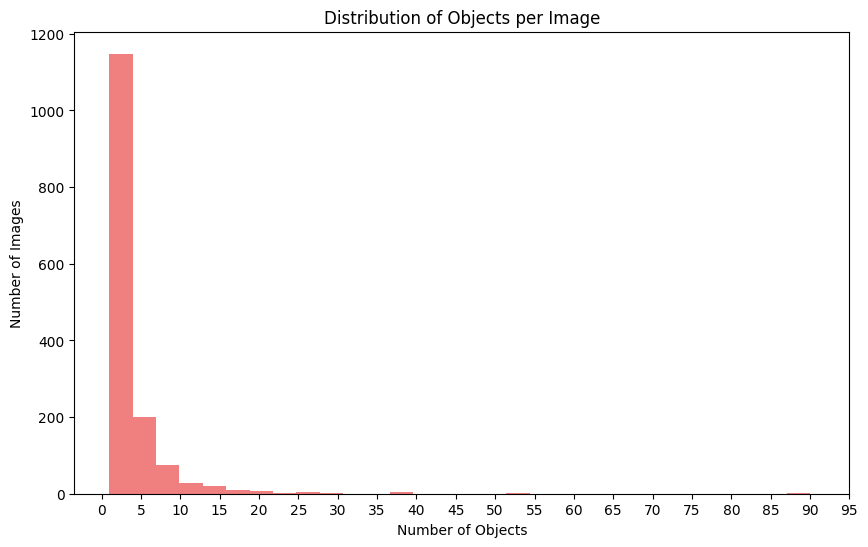

Mean number of objects per image: 3.19


In [168]:
import matplotlib.pyplot as plt
from collections import defaultdict

# Calculate object count per image
image_object_counts = defaultdict(int)

for ann in data['annotations']:
    image_object_counts[ann['image_id']] += 1

# Get a list of object counts per image
object_counts_per_image = list(image_object_counts.values())

# Plot distribution of object counts per image
plt.figure(figsize=(10, 6))
plt.hist(object_counts_per_image, bins=30, color='lightcoral')

# Set x-axis ticks with an increment of 5
max_x = plt.gca().get_xlim()[1]  # Get the current maximum x-value
plt.xticks(range(0, int(max_x) + 5, 5))  # Set x-ticks with an increment of 5

plt.title("Distribution of Objects per Image")
plt.xlabel("Number of Objects")
plt.ylabel("Number of Images")
plt.show()

# Mean number of objects per image
mean_objects_per_image = sum(object_counts_per_image) / len(object_counts_per_image)
print(f"Mean number of objects per image: {mean_objects_per_image:.2f}")


In [110]:
import json
import os
import cv2
import matplotlib.pyplot as plt

# Path to the TACO annotations JSON file
annotations_path = 'data/annotations.json'

# Load the annotations file
with open(annotations_path) as f:
    data = json.load(f)

# Extract categories, images, and annotations
categories = {cat['id']: cat['name'] for cat in data['categories']}
images = {img['id']: img for img in data['images']}
annotations_dict = {ann['image_id']: [] for ann in data['annotations']}
for ann in data['annotations']:
    annotations_dict[ann['image_id']].append(ann)

In [111]:
# Extract categories and annotations from the JSON data
categories = {cat['id']: cat['name'] for cat in data['categories']}
annotations = data['annotations']
images = {img['id']: img for img in data['images']}

def show_image_with_boxes(image_id):
    # Find the corresponding image info
    image_info = images[image_id]
    image_path = f"data/{image_info['file_name']}"

    # Read the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Could not load image: {image_path}")
        return

    # Convert to RGB (OpenCV uses BGR by default)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Filter annotations for this image
    image_annotations = [ann for ann in annotations if ann['image_id'] == image_info['id']]

    # Draw bounding boxes and category labels
    for ann in image_annotations:
        # Get bbox coordinates (x, y, width, height)
        x, y, width, height = ann['bbox']
        category_id = ann['category_id']
        category_name = categories[category_id]

        # Draw the bounding box
        cv2.rectangle(image, (int(x), int(y)), (int(x + width), int(y + height)), (0, 255, 0), 2)

        # Add the category label in red
        label = f"{category_name}"
        cv2.putText(image, label, (int(x), int(y) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)
        #Put the category label in white
        #cv2.putText(image, label,(int(x), int(y) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8,(255, 255, 255), 2, cv2.LINE_AA)

    # Display the image with bounding boxes and labels
    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    plt.axis('off')
    plt.show()


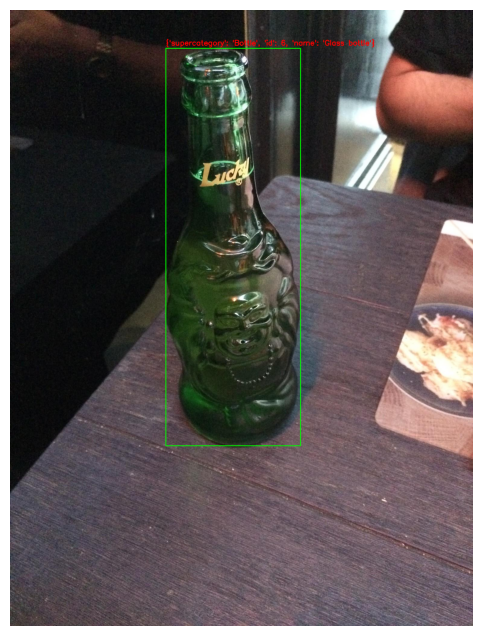

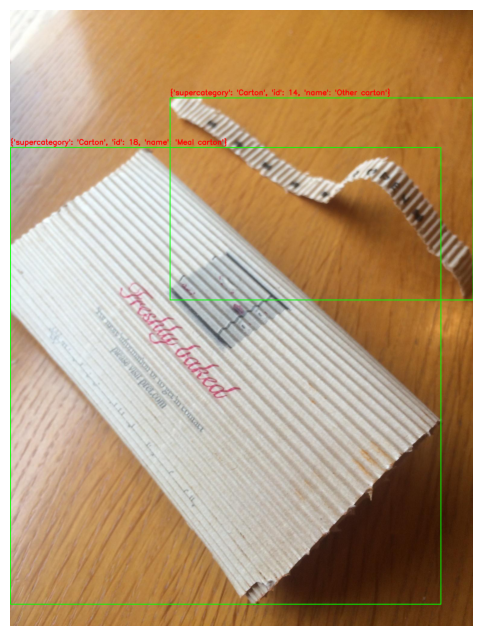

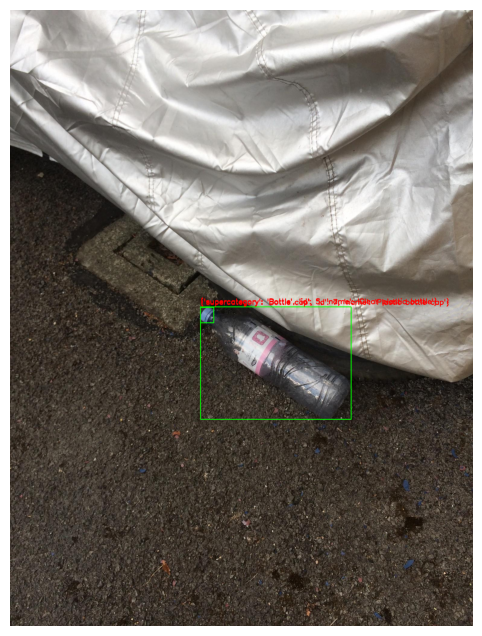

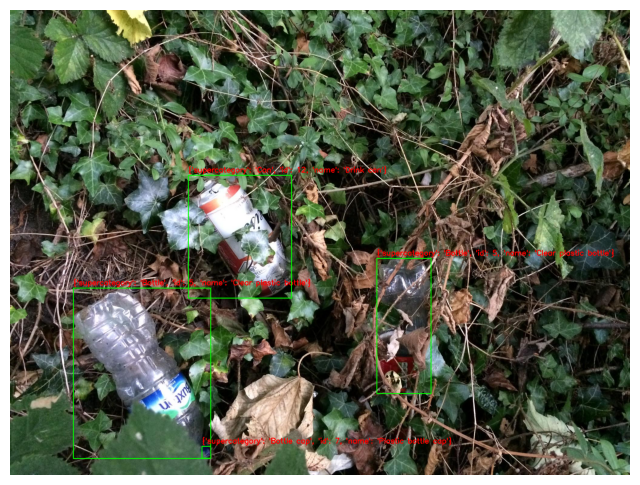

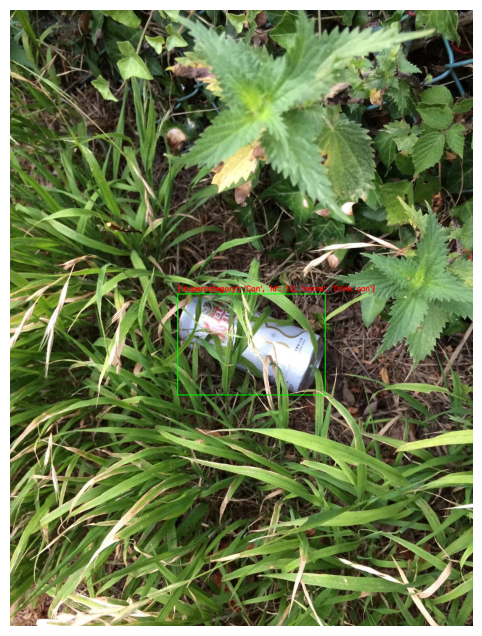

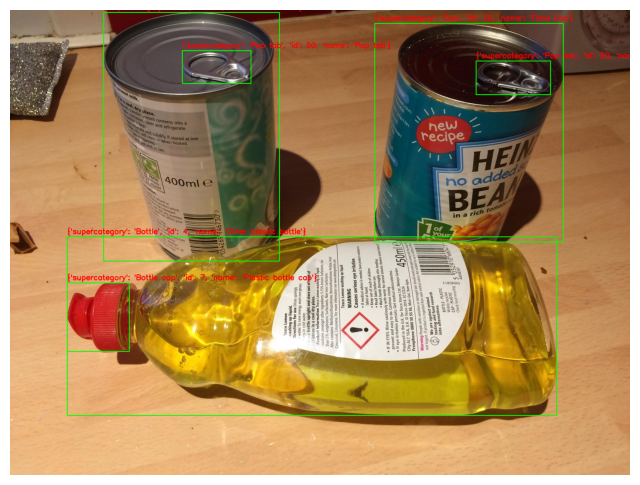

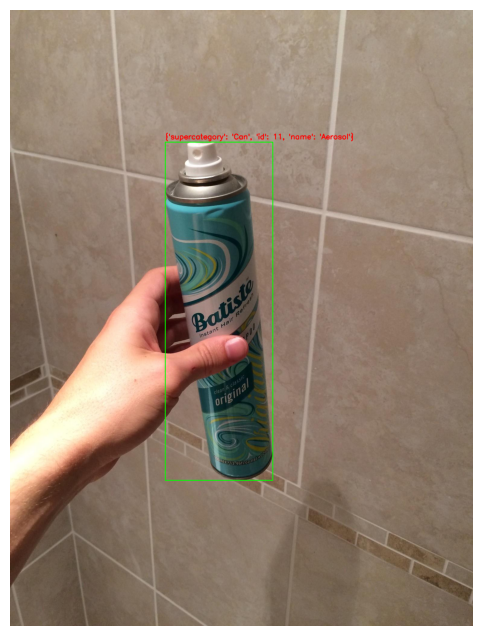

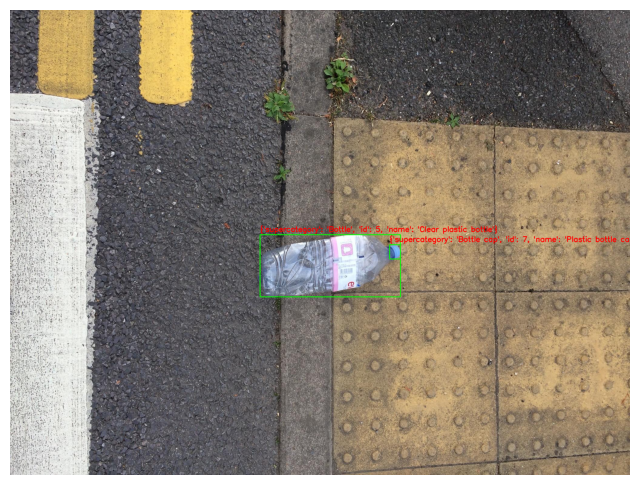

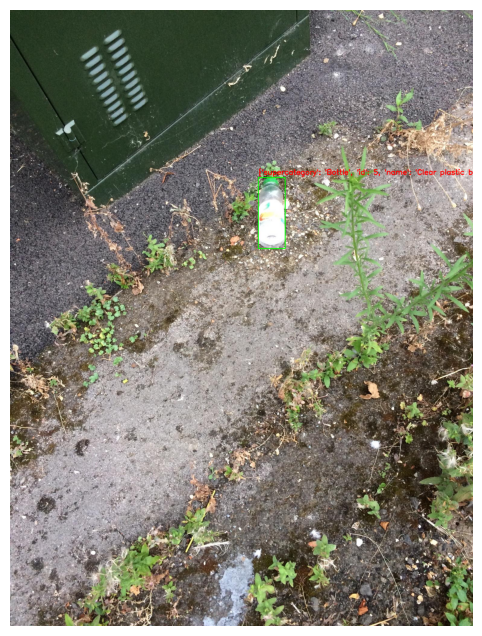

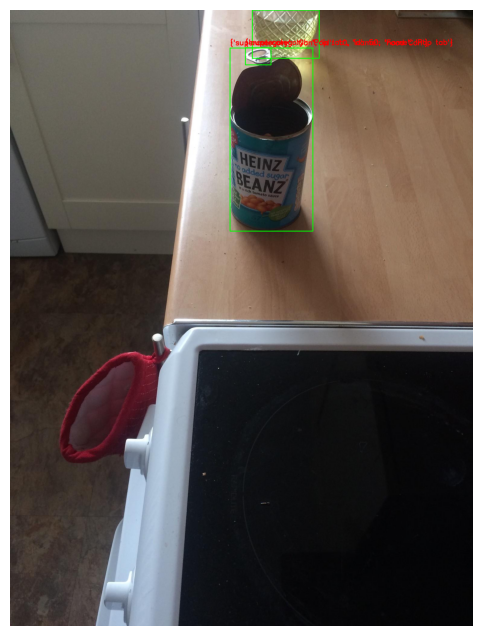

In [114]:
# Show the first 10 images with bounding boxes and category labels
for i in range(10):
    show_image_with_boxes(i)

In [115]:
# Extract categories from the annotations data
categories = data.get('categories', [])

# Create a dictionary to store supercategories and their corresponding categories
supercategory_dict = {}

# Iterate over categories to group them by supercategory
for category in categories:
    supercategory = category.get('supercategory', 'Uncategorized')  # Default to 'Uncategorized' if no supercategory
    category_name = category.get('name', 'Unknown Category')

    # Add the category under the corresponding supercategory
    if supercategory not in supercategory_dict:
        supercategory_dict[supercategory] = []
    supercategory_dict[supercategory].append(category_name)

# Now print each supercategory and its categories
for supercategory, category_list in supercategory_dict.items():
    print(f"Supercategory: {supercategory}")
    for category in category_list:
        print(f" - {category}")
    print()  # Add an empty line for readability


Supercategory: Aluminium foil
 - Aluminium foil

Supercategory: Battery
 - Battery

Supercategory: Blister pack
 - Aluminium blister pack
 - Carded blister pack

Supercategory: Bottle
 - Other plastic bottle
 - Clear plastic bottle
 - Glass bottle

Supercategory: Bottle cap
 - Plastic bottle cap
 - Metal bottle cap

Supercategory: Broken glass
 - Broken glass

Supercategory: Can
 - Food Can
 - Aerosol
 - Drink can

Supercategory: Carton
 - Toilet tube
 - Other carton
 - Egg carton
 - Drink carton
 - Corrugated carton
 - Meal carton
 - Pizza box

Supercategory: Cup
 - Paper cup
 - Disposable plastic cup
 - Foam cup
 - Glass cup
 - Other plastic cup

Supercategory: Food waste
 - Food waste

Supercategory: Glass jar
 - Glass jar

Supercategory: Lid
 - Plastic lid
 - Metal lid

Supercategory: Other plastic
 - Other plastic

Supercategory: Paper
 - Magazine paper
 - Tissues
 - Wrapping paper
 - Normal paper

Supercategory: Paper bag
 - Paper bag
 - Plastified paper bag

Supercategory: Plast

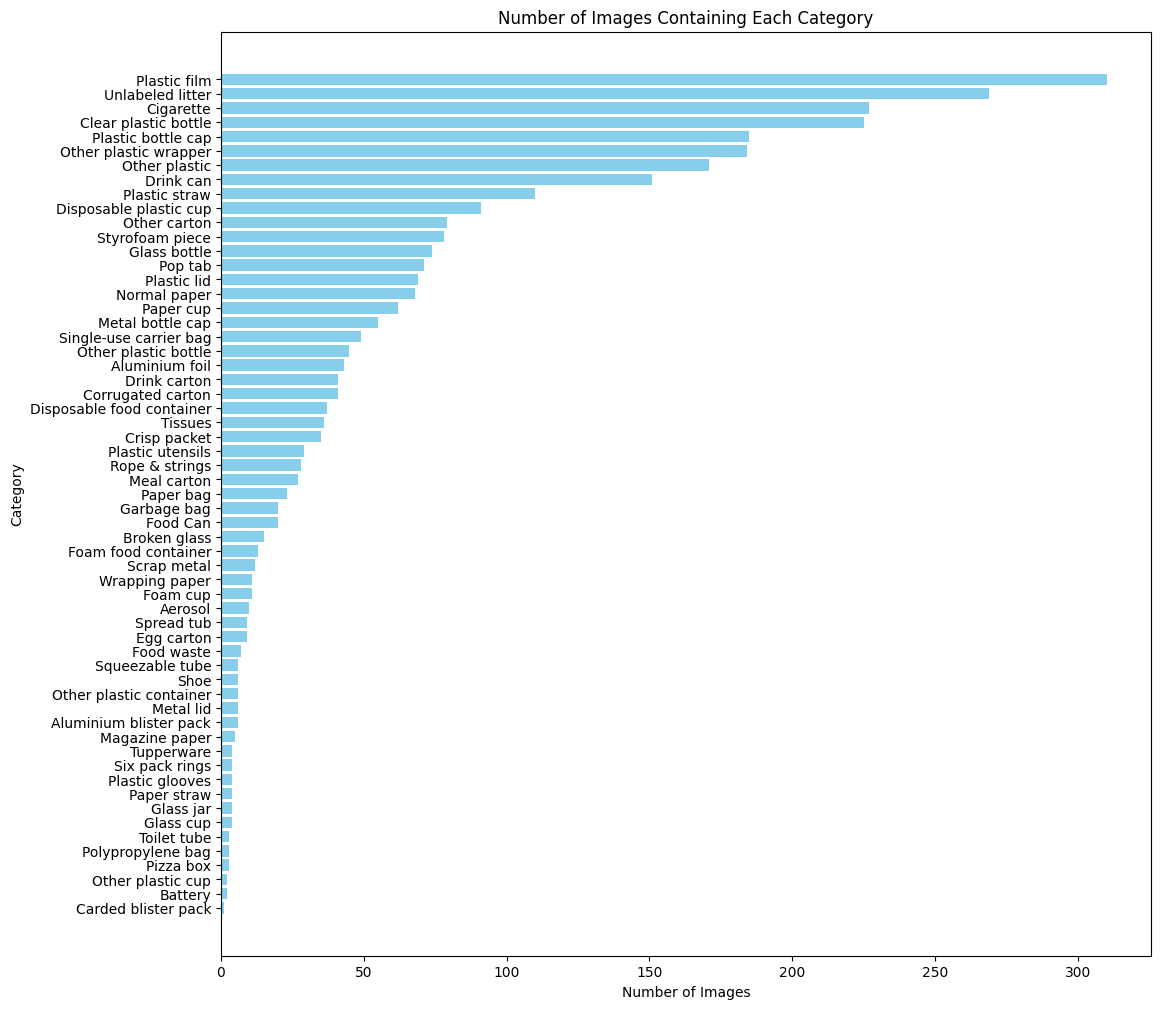

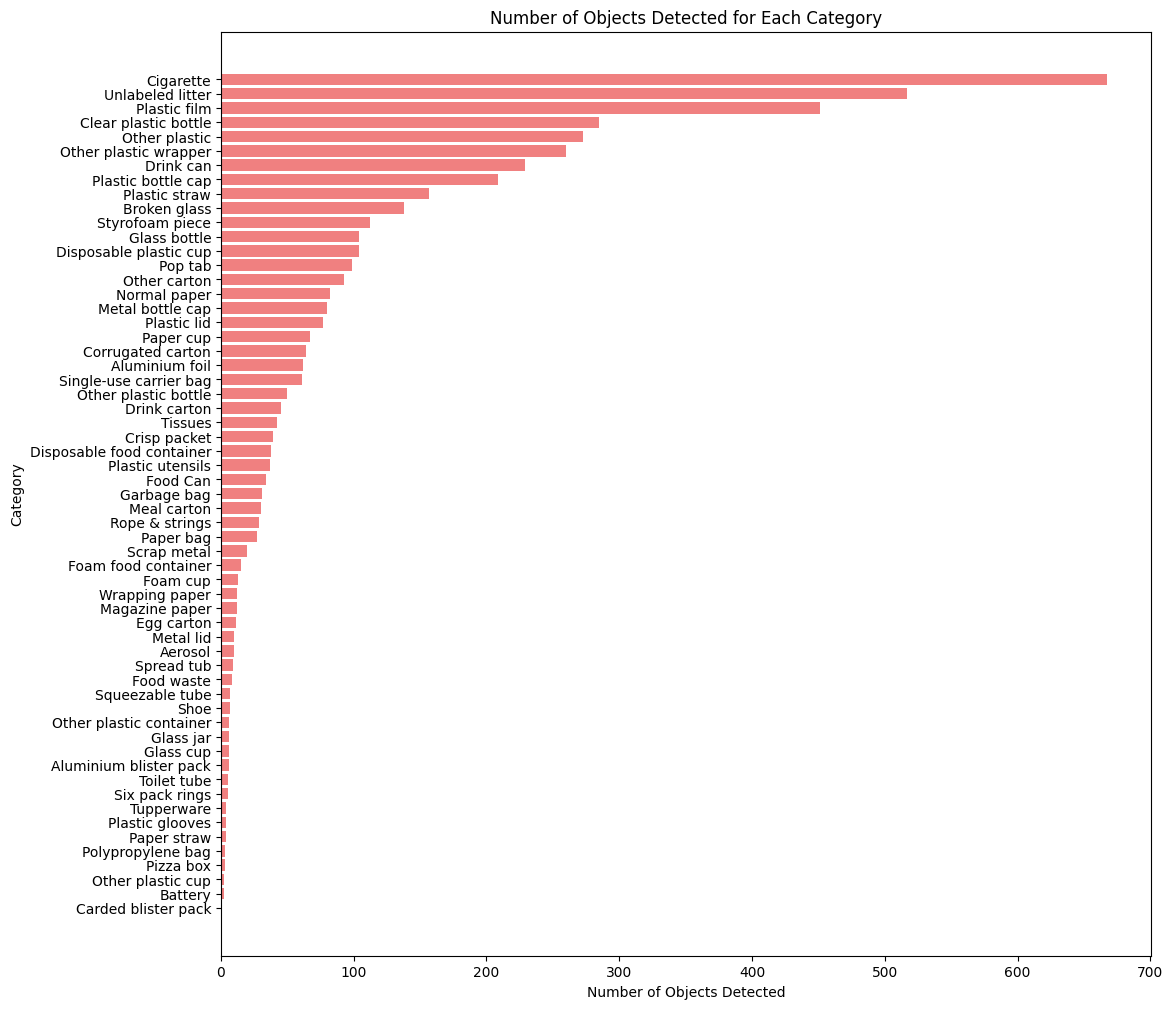

In [116]:
from collections import defaultdict

# Extract the annotations and categories
annotations = data.get('annotations', [])
categories = data.get('categories', [])

# Create a mapping for category ids to names
category_id_to_name = {category['id']: category['name'] for category in categories}

# Create dictionaries to count images per category and objects per category
image_count_per_category = defaultdict(set)  # Uses a set to avoid counting the same image multiple times
object_count_per_category = defaultdict(int)

# Initialize total counts for calculating mean objects per image
total_objects = 0
unique_images = set()

# Iterate through annotations
for annotation in annotations:
    image_id = annotation['image_id']
    category_id = annotation['category_id']

    # Update the image count for the category (one image may contain multiple categories)
    image_count_per_category[category_id].add(image_id)

    # Update the object count for the category
    object_count_per_category[category_id] += 1

    # Update total objects and images
    total_objects += 1

    # Add image_id to the set of unique images
    unique_images.add(image_id)

# Convert image counts from sets to actual counts
image_count_per_category = {cat_id: len(images) for cat_id, images in image_count_per_category.items()}

# Convert category ids to category names for easier plotting
category_names = [category_id_to_name[cat_id] for cat_id in image_count_per_category.keys()]
image_counts = list(image_count_per_category.values())

# The total number of unique images
total_images = len(unique_images)

# Sort categories by number of images (descending order)
sorted_image_counts, sorted_category_names = zip(*sorted(zip(image_counts, category_names), reverse=False))

# Plot the histogram of number of images containing each category (sorted)
plt.figure(figsize=(12, 12))
plt.barh(sorted_category_names, sorted_image_counts, color='skyblue')
plt.xlabel('Number of Images')
plt.ylabel('Category')
plt.title('Number of Images Containing Each Category')
plt.show()

# Sort categories by number of objects (descending order)
object_counts = [object_count_per_category[cat_id] for cat_id in image_count_per_category.keys()]
sorted_object_counts, sorted_category_names_objects = zip(*sorted(zip(object_counts, category_names), reverse=False))

# Plot the histogram of number of objects detected for each category (sorted)
plt.figure(figsize=(12, 12))
plt.barh(sorted_category_names_objects, sorted_object_counts, color='lightcoral')
plt.xlabel('Number of Objects Detected')
plt.ylabel('Category')
plt.title('Number of Objects Detected for Each Category')
plt.show()


In [117]:
# Calculate mean number of objects per image
mean_objects_per_image = round(total_objects / total_images, 2) if total_images != 0 else 0
print(f'Mean number of objects per image: {mean_objects_per_image}')

Mean number of objects per image: 3.19


## Split Data into YOLO format

In [118]:
import json
import os
from pathlib import Path
import random
import shutil

# Paths to your TACO dataset
coco_json_path = 'data/annotations.json'  # Path to TACO's annotations file
images_dir = 'data'                  # Path to TACO's main image directory with batch subfolders
output_dir = 'TACO'   # Base directory for YOLO format

# Train, validation, test split ratios
train_ratio = 0.7
val_ratio = 0.2
test_ratio = 0.1

# Ensure output directories for train, val, and test sets
for split in ['train', 'val', 'test']:
    Path(output_dir, split, 'images').mkdir(parents=True, exist_ok=True)
    Path(output_dir, split, 'labels').mkdir(parents=True, exist_ok=True)

# Load TACO annotations
with open(coco_json_path, 'r') as f:
    data = json.load(f)

# Get category mappings
categories = {category['id']: category['name'] for category in data['categories']}

# Shuffle images for random split
images = data['images']
random.shuffle(images)
n_train = int(len(images) * train_ratio)
n_val = int(len(images) * val_ratio)

# Split images into train, val, test
splits = {
    'train': images[:n_train],
    'val': images[n_train:n_train + n_val],
    'test': images[n_train + n_val:]
}

# Counter for the total number of images moved
total_images_moved = 0

# Convert annotations and save them into respective split folders
for split, split_images in splits.items():
    for img in split_images:
        img_id = img['id']
        img_file_name = img['file_name']  # This should be in the format 'batch_x/filename.jpg'
        img_width, img_height = img['width'], img['height']

        # Derive the image path within one of the 15 batch folders
        img_path = os.path.join(images_dir, img_file_name)
        img_name = img_file_name.split('/')[-1]  # Get the image filename only

        # Copy image to the corresponding split folder
        split_image_path = os.path.join(output_dir, split, 'images', img_name)
        if os.path.exists(img_path):
            shutil.copy(img_path, split_image_path)
            total_images_moved += 1  # Increment the counter

            # Create a corresponding label file for each image
            label_file_path = os.path.join(output_dir, split, 'labels', os.path.splitext(img_name)[0] + '.txt')
            with open(label_file_path, 'w') as label_file:
                # Find all annotations for the current image
                for ann in data['annotations']:
                    if ann['image_id'] == img_id:
                        category_id = ann['category_id']
                        # Ensure the category is in our mapping
                        if category_id in categories:
                            # YOLO format requires x_center, y_center, width, and height normalized
                            x, y, width, height = ann['bbox']
                            x_center = (x + width / 2) / img_width
                            y_center = (y + height / 2) / img_height
                            width /= img_width
                            height /= img_height

                            # Write the label file in YOLO format: <class_id> <x_center> <y_center> <width> <height>
                            label_file.write(f"{category_id} {x_center} {y_center} {width} {height}\n")

# Print the total number of images moved
print(f"Total number of images moved: {total_images_moved}")

Total number of images moved: 1500


## Delete Unwanted Categories and Update Existing Ones

In [119]:
import os

# Define the new category mapping
desired_categories = {
    36: 0,  # Plastic film
    58: 1,  # Unlabeled litter
    59: 2,  # Cigarette
    5: 3,   # Clear plastic bottle
    7: 4,   # Plastic bottle cap
    39: 5,  # Other plastic wrapper
    29: 6,  # Other plastic
    12: 7   # Drink can
}

# Path to the directory containing label files
label_base_dir = 'TACO'  # Adjust if necessary
splits = ['train', 'val', 'test']  # Assumes you have 'train', 'val', and 'test' splits

# Process each split
for split in splits:
    label_dir = os.path.join(label_base_dir, split, 'labels')

    # Loop over all label files in the current split
    for label_file in os.listdir(label_dir):
        label_file_path = os.path.join(label_dir, label_file)

        # Read the original label data
        with open(label_file_path, 'r') as file:
            lines = file.readlines()

        # Prepare a list to hold the updated lines
        updated_lines = []

        # Process each line in the label file
        for line in lines:
            # Parse the line to get the category ID and bounding box values
            parts = line.strip().split()
            category_id = int(parts[0])

            # Check if the category ID is in the desired mapping
            if category_id in desired_categories:
                # Update the category ID to the new mapping
                new_category_id = desired_categories[category_id]

                # Create the updated line with the new category ID
                updated_line = f"{new_category_id} " + " ".join(parts[1:]) + "\n"
                updated_lines.append(updated_line)

        # Write the updated lines back to the file
        with open(label_file_path, 'w') as file:
            file.writelines(updated_lines)

print("Label files have been updated with only the specified categories and new IDs.")


Label files have been updated with only the specified categories and new IDs.


## Delete Files that Don't Contain Objects in the Categories of Interest

In [120]:
import os

# Path to the base directory containing split folders
base_dir = 'TACO'  # Adjust if necessary
splits = ['train', 'val', 'test']  # Assumes you have 'train', 'val', and 'test' splits

# Initialize a counter for deleted files
total_deleted_files = 0

# Loop through each split
for split in splits:
    label_dir = os.path.join(base_dir, split, 'labels')
    image_dir = os.path.join(base_dir, split, 'images')

    # Loop over each label file in the current label directory
    for label_file in os.listdir(label_dir):
        label_file_path = os.path.join(label_dir, label_file)

        # Check if the label file is empty
        if os.path.getsize(label_file_path) == 0:
            # Construct possible image file paths
            base_image_name = os.path.splitext(label_file)[0]
            image_file_path_jpg = os.path.join(image_dir, base_image_name + '.jpg')
            image_file_path_jpg_upper = os.path.join(image_dir, base_image_name + '.JPG')

            # Delete the label file
            os.remove(label_file_path)
            total_deleted_files += 1

            # Delete the associated image file if it exists
            if os.path.exists(image_file_path_jpg):
                os.remove(image_file_path_jpg)
                total_deleted_files += 1
            elif os.path.exists(image_file_path_jpg_upper):
                os.remove(image_file_path_jpg_upper)
                total_deleted_files += 1

# Print the total number of files deleted
print(f"Total number of files deleted (label and image): {total_deleted_files}")


Total number of files deleted (label and image): 322


In [122]:
# Extract categories and annotations from the JSON data
categories = {cat['id']: cat['name'] for cat in data['categories']}
annotations = data['annotations']
images = {img['id']: img for img in data['images']}

def show_image_with_boxes(image_id):
    # Find the corresponding image info
    image_info = images[image_id]
    image_path = f"data/{image_info['file_name']}"

    # Read the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Could not load image: {image_path}")
        return

    # Convert to RGB (OpenCV uses BGR by default)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Filter annotations for this image
    image_annotations = [ann for ann in annotations if ann['image_id'] == image_info['id']]

    # Draw bounding boxes and category labels
    for ann in image_annotations:
        # Get bbox coordinates (x, y, width, height)
        x, y, width, height = ann['bbox']
        category_id = ann['category_id']
        category_name = categories[category_id]

        # Draw the bounding box
        cv2.rectangle(image, (int(x), int(y)), (int(x + width), int(y + height)), (0, 255, 0), 2)

        # Add the category label in red
        label = f"{category_name}"
        cv2.putText(image, label, (int(x), int(y) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)
        #Put the category label in white
        #cv2.putText(image, label,(int(x), int(y) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8,(255, 255, 255), 2, cv2.LINE_AA)

    # Display the image with bounding boxes and labels
    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    plt.axis('off')
    plt.show()


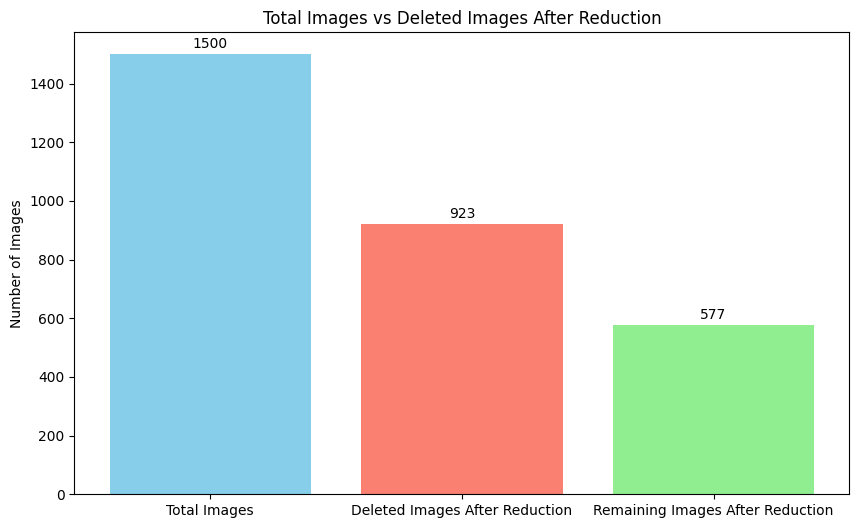

Total Images: 1500
Deleted Images After Reduction: 923
Remaining Images After Reduction: 577


In [138]:
import json
import matplotlib.pyplot as plt

# Define the desired categories mapping (based on your updated category IDs)
desired_categories = {
    36: 0,  # Plastic film
    58: 1,  # Unlabeled litter
    59: 2,  # Cigarette
    5: 3,   # Clear plastic bottle
    7: 4,   # Plastic bottle cap
    39: 5,  # Other plastic wrapper
    29: 6,  # Other plastic
    12: 7   # Drink can
}

# Path to the TACO annotations JSON file
annotations_path = 'data/annotations.json'

# Load the annotations file
with open(annotations_path) as f:
    data = json.load(f)

# Initialize counters
total_images = len(data['images'])

# Track images associated with categories we want to delete
deleted_image_ids = set()

# Count deleted images based on undesired categories
for ann in data['annotations']:
    if ann['category_id'] not in desired_categories:
        deleted_image_ids.add(ann['image_id'])

# Deleted images count is based on unique image IDs with undesired categories
deleted_images_count = len(deleted_image_ids)

# Remaining images after deletion
remaining_images_count = total_images - deleted_images_count

# Plot the results
labels = ['Total Images', 'Deleted Images After Reduction', 'Remaining Images After Reduction']
counts = [total_images, deleted_images_count, remaining_images_count]

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, counts, color=['skyblue', 'salmon', 'lightgreen'])

# Display the number on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 10, int(yval), ha='center', va='bottom', fontsize=10)

plt.ylabel("Number of Images")
plt.title("Total Images vs Deleted Images After Reduction")
plt.show()

# Print the counts
print(f"Total Images: {total_images}")
print(f"Deleted Images After Reduction: {deleted_images_count}")
print(f"Remaining Images After Reduction: {remaining_images_count}")


## Visualize the New Categories for Train, Val, and Test sets

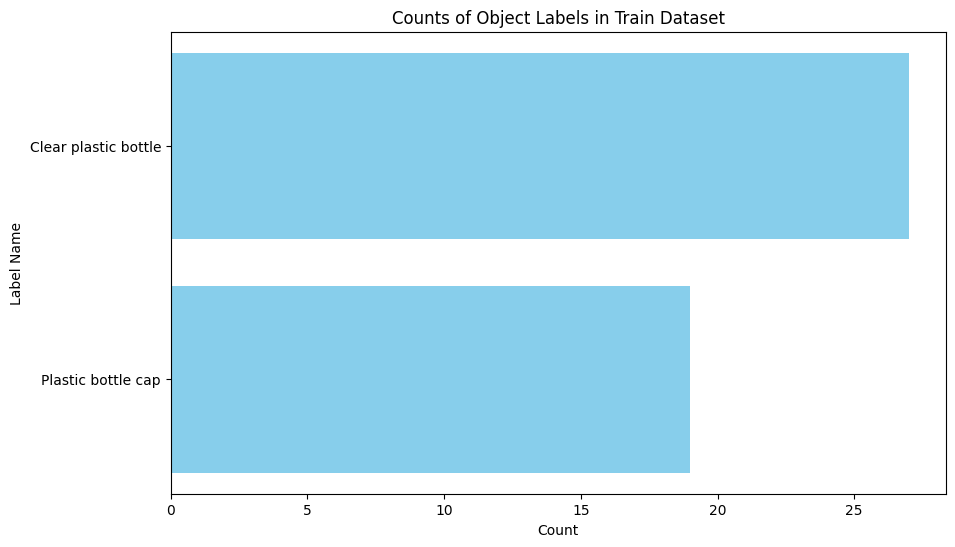

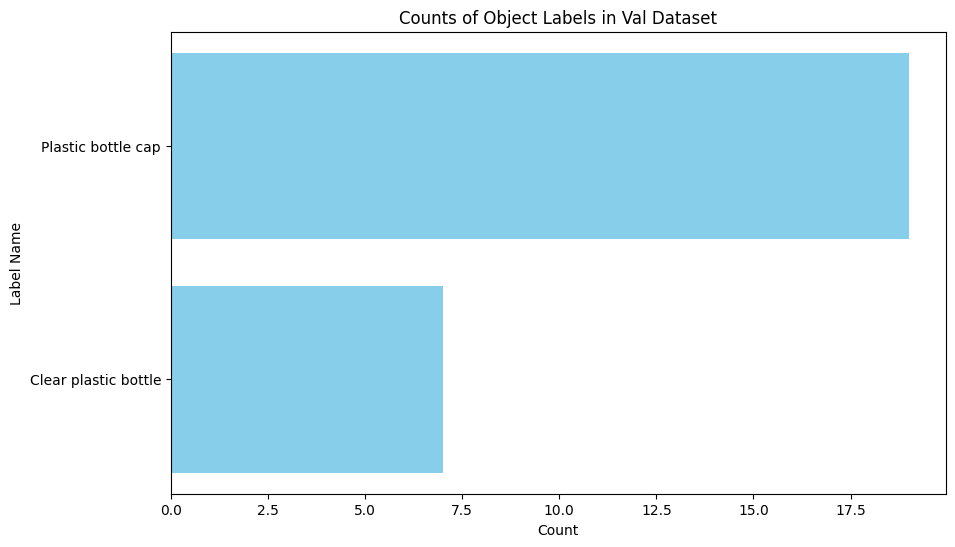

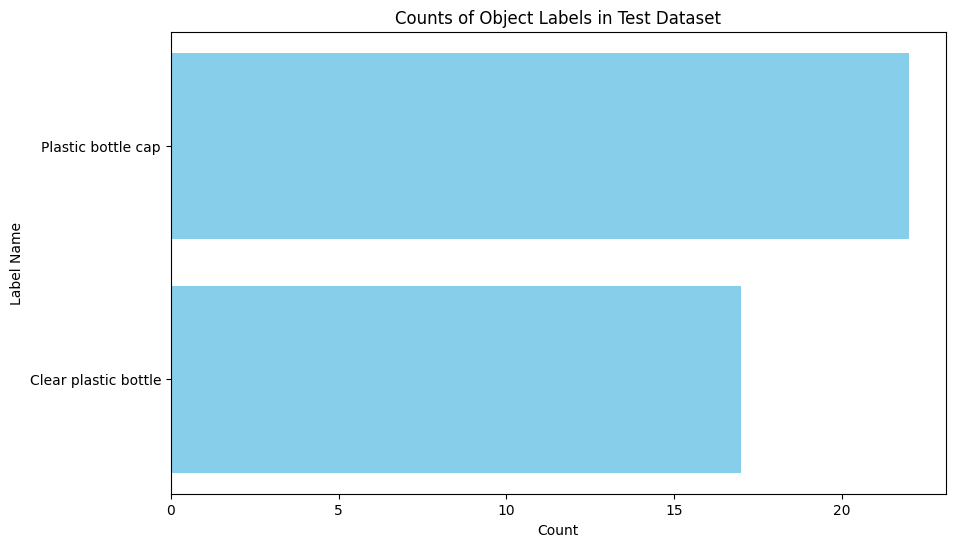

In [20]:
import os
import matplotlib.pyplot as plt
from collections import Counter

# Path to the base directory containing split folders
base_dir = 'TACO'  # Adjust if necessary
splits = ['train', 'val', 'test']  # Assumes you have 'train', 'val', and 'test' splits

# Define a mapping from label IDs to names
label_names = {
    0: "Plastic film",
    1: "Unlabeled litter",
    2: "Cigarette",
    3: "Clear plastic bottle",
    4: "Plastic bottle cap",
    5: "Other plastic wrapper",
    6: "Other plastic",
    7: "Drink can"
}

# Function to plot label counts for a given split
def plot_label_counts(split, label_counts):
    # Convert label IDs to label names and sort by count
    labels, counts = zip(*sorted(
        [(label_names[label_id], count) for label_id, count in label_counts.items()],
        key=lambda x: x[1]
    ))

    # Plotting a horizontal bar chart for the split
    plt.figure(figsize=(10, 6))
    plt.barh(labels, counts, color='skyblue')
    plt.xlabel("Count")
    plt.ylabel("Label Name")
    plt.title(f"Counts of Object Labels in {split.capitalize()} Dataset")
    plt.show()

# Loop through each split
for split in splits:
    label_dir = os.path.join(base_dir, split, 'labels')

    # Initialize a counter for label counts for the current split
    label_counts = Counter()

    # Loop over each label file in the current label directory
    for label_file in os.listdir(label_dir):
        label_file_path = os.path.join(label_dir, label_file)

        # Read the label file
        with open(label_file_path, 'r') as file:
            lines = file.readlines()

            # Count each label in the file
            for line in lines:
                parts = line.strip().split()
                label_id = int(parts[0])  # The label ID is the first element
                label_counts[label_id] += 1

    # Plot label counts for the current split
    plot_label_counts(split, label_counts)


## Visualization of Selected Categories

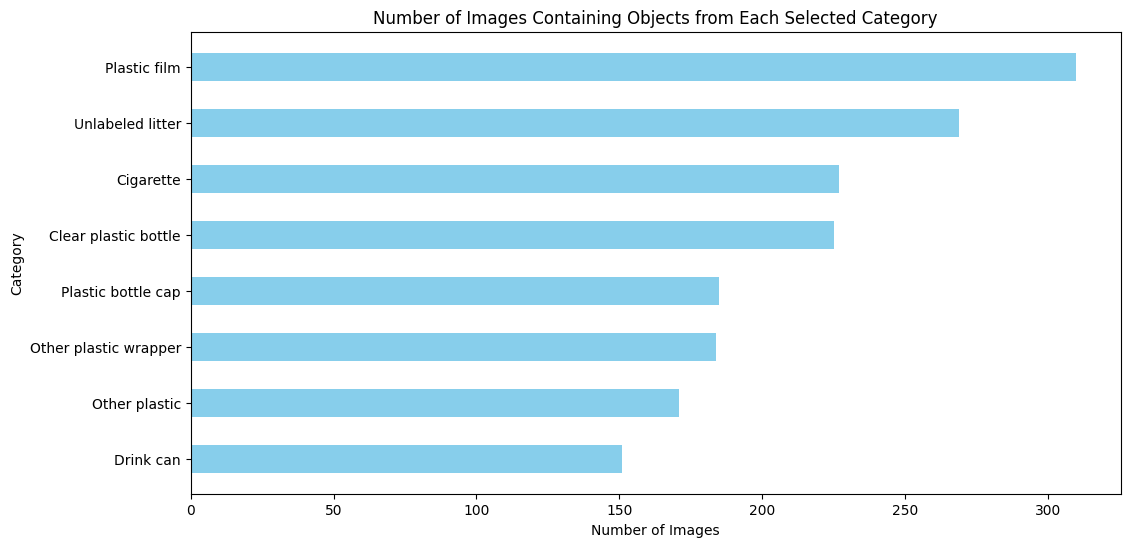

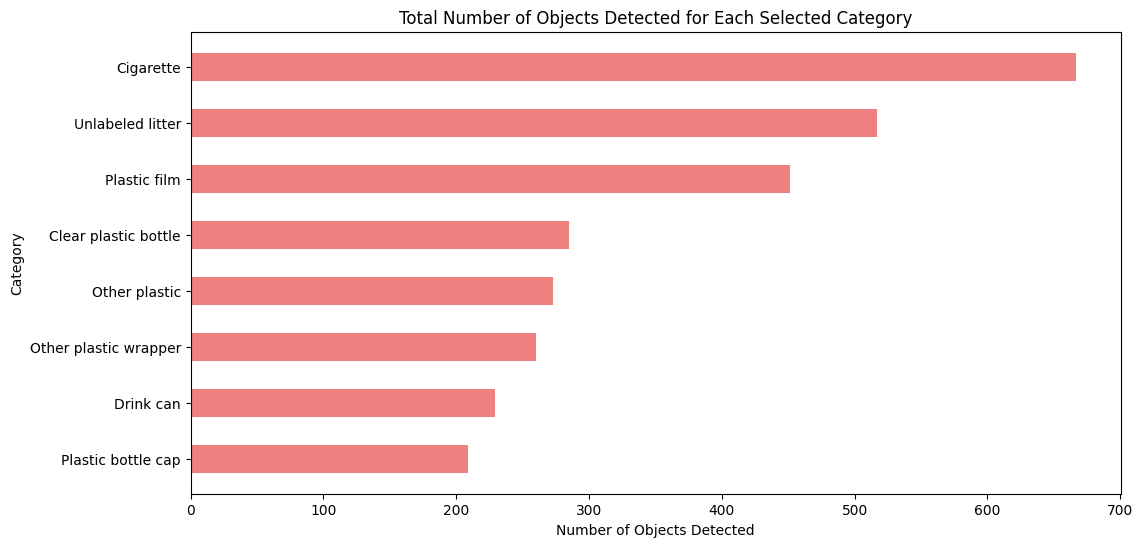

Category: Plastic film
Number of Images: 310
Number of Objects: 451
----------------------------------------
Category: Unlabeled litter
Number of Images: 269
Number of Objects: 517
----------------------------------------
Category: Cigarette
Number of Images: 227
Number of Objects: 667
----------------------------------------
Category: Clear plastic bottle
Number of Images: 225
Number of Objects: 285
----------------------------------------
Category: Plastic bottle cap
Number of Images: 185
Number of Objects: 209
----------------------------------------
Category: Other plastic wrapper
Number of Images: 184
Number of Objects: 260
----------------------------------------
Category: Other plastic
Number of Images: 171
Number of Objects: 273
----------------------------------------
Category: Drink can
Number of Images: 151
Number of Objects: 229
----------------------------------------


In [143]:
import matplotlib.pyplot as plt
from collections import defaultdict

# Mapping of category IDs to category names based on your provided mapping
category_mapping = {
    36: "Plastic film",
    58: "Unlabeled litter",
    59: "Cigarette",
    5: "Clear plastic bottle",
    7: "Plastic bottle cap",
    39: "Other plastic wrapper",
    29: "Other plastic",
    12: "Drink can"
}

# Assuming you have your data loaded as 'data'
annotations = data.get('annotations', [])
categories = data.get('categories', [])

# Initialize dictionaries to count the number of unique images and the number of objects per category
image_count_per_category = defaultdict(set)  # Track unique images per category
object_count_per_category = defaultdict(int)  # Track total number of objects per category

# Process each annotation to count images and objects
for annotation in annotations:
    category_id = annotation['category_id']
    image_id = annotation['image_id']

    # Only process if the annotation's category is one of the selected categories
    if category_id in category_mapping:
        # Add the image to the set for this category (ensures unique images are counted)
        image_count_per_category[category_id].add(image_id)

        # Increment the count of objects for this category
        object_count_per_category[category_id] += 1

# Prepare the data for visualization
category_names = []
image_counts = []
object_counts = []

# Loop through the category mapping and fetch the counts
for category_id, category_name in category_mapping.items():
    category_names.append(category_name)
    image_counts.append(len(image_count_per_category[category_id]))  # Number of unique images with this category
    object_counts.append(object_count_per_category[category_id])  # Total number of objects for this category

# Sort categories by number of images (ascending order for plotting)
sorted_image_counts, sorted_category_names = zip(*sorted(zip(image_counts, category_names), reverse=False))
sorted_object_counts, sorted_category_names_objects = zip(*sorted(zip(object_counts, category_names), reverse=False))

# Plot the number of images containing objects from each selected category
plt.figure(figsize=(12, 6))
plt.barh(sorted_category_names, sorted_image_counts, color='skyblue', height=0.5)
plt.xlabel('Number of Images')
plt.ylabel('Category')
plt.title('Number of Images Containing Objects from Each Selected Category')
plt.show()

# Plot the total number of objects detected for each selected category
plt.figure(figsize=(12, 6))
plt.barh(sorted_category_names_objects, sorted_object_counts, color='lightcoral', height=0.5)
plt.xlabel('Number of Objects Detected')
plt.ylabel('Category')
plt.title('Total Number of Objects Detected for Each Selected Category')
plt.show()

# Optionally, print out the number of images and objects for each category
for category_id, category_name in category_mapping.items():
    print(f"Category: {category_name}")
    print(f"Number of Images: {len(image_count_per_category[category_id])}")
    print(f"Number of Objects: {object_count_per_category[category_id]}")
    print("-" * 40)


In [145]:
# Calculate the total number of objects and total number of images
total_objects = sum(object_counts)
total_images = sum(image_counts)

# Calculate the total mean number of objects per image across all categories
total_mean_objects_per_image = round(total_objects / total_images, 2) if total_images != 0 else 0

# Print the total mean number of objects per image
print(f'Total mean number of objects per image: {total_mean_objects_per_image}')


Total mean number of objects per image: 1.68


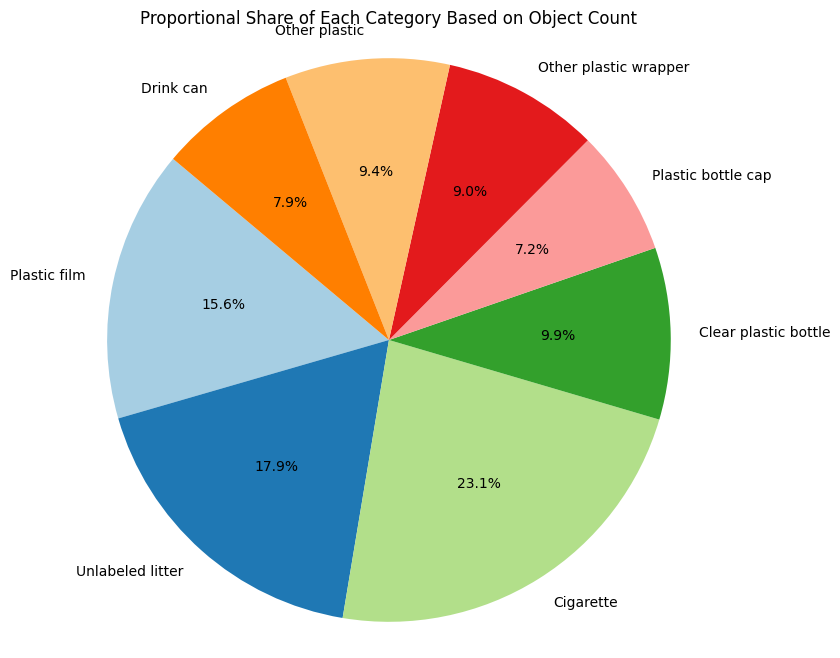

In [150]:
# Create a pie chart showing the proportion of objects per category
plt.figure(figsize=(8, 8))
plt.pie(object_counts, labels=category_names, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Proportional Share of Each Category Based on Object Count')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()